# training and buiilding the Gender and age group classification model 

### **Step #1**: Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from shutil import copyfile
from scipy.stats import skew, kurtosis
########################################################
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
###########################################
# This is a simple keras or tensorflow.keras library import for CNN 
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Input,Dropout,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

##################################################
from imblearn.under_sampling import RandomUnderSampler
from keras.callbacks import Callback

####################################
from tqdm.notebook import tqdm

# This is a simple keras library import for CNN 
print("cv2_version:",cv2.__version__)


cv2_version: 4.9.0


In [2]:
%store -r saveMLmodelfile_name
print("modelname:", saveMLmodelfile_name)
%store -r project_path
print("project_path:", project_path)
%store -r result_filepath
print("result_filepath:", result_filepath)


modelname: exp01_genderAge_model
project_path: d:\deep learning\project for deep learning\Gender_Age-group_classification_project
result_filepath: d:\deep learning\project for deep learning\Gender_Age-group_classification_project/experiments/experiment_01/result/


### **Step #5**: preparation input face_image ( UTKFace_traindataset and UTKFace_traindataset)  of the  CNN  model 

#### a) normalization of image and paths for your train and val dataset

In [3]:
# Define paths for your dataset
train_dirPath = project_path+"/dataset/UTKFace_Processed_Traindataset"
val_dirPath= project_path+"/dataset/UTKFace_Processed_Valdataset"

In [4]:
def normalize_image(image):
    # Convert to floating-point values #img_float = (image.astype(np.float32))
    # Normalize pixel values to [0, 1]
    normalized_image = (image.astype(np.float32)) / 255.0

    return normalized_image 

#### b) normalization of image of  UTKFace_traindataset and UTKFace_traindataset

In [5]:
train_faceImage=[]

for img in tqdm(os.listdir(train_dirPath)): 
    train_faceImage.append(normalize_image(np.array(cv2.imread(str(train_dirPath)+"/"+str(img),-1))))

total_train_faceImage=len(train_faceImage)
print("total no of train_faceImage: ", len(train_faceImage))
print("sample of train_faceImage: ",train_faceImage[0])

  0%|          | 0/43420 [00:00<?, ?it/s]

total no of train_faceImage:  43420
sample of train_faceImage:  [[[0.19607843 0.3137255  0.42745098]
  [0.15294118 0.2784314  0.39215687]
  [0.16470589 0.29803923 0.4117647 ]
  ...
  [0.3372549  0.48235294 0.6156863 ]
  [0.3019608  0.4392157  0.57254905]
  [0.32156864 0.45882353 0.5921569 ]]

 [[0.20392157 0.32156864 0.43529412]
  [0.16078432 0.28627452 0.4       ]
  [0.14901961 0.28235295 0.39607844]
  ...
  [0.3372549  0.48235294 0.6156863 ]
  [0.32156864 0.45882353 0.5921569 ]
  [0.3254902  0.4627451  0.59607846]]

 [[0.20392157 0.32156864 0.42745098]
  [0.1764706  0.30588236 0.40784314]
  [0.14901961 0.28627452 0.3882353 ]
  ...
  [0.3529412  0.49411765 0.63529414]
  [0.35686275 0.49411765 0.627451  ]
  [0.33333334 0.47058824 0.6039216 ]]

 ...

 [[0.00784314 0.01568628 0.01568628]
  [0.01568628 0.02352941 0.02352941]
  [0.01960784 0.02745098 0.02745098]
  ...
  [0.2784314  0.4117647  0.5529412 ]
  [0.18039216 0.28235295 0.4       ]
  [0.11372549 0.20784314 0.3019608 ]]

 [[0.00784

In [6]:
val_faceImage=[]

for img in tqdm(os.listdir(val_dirPath)): 
    val_faceImage.append(normalize_image(np.array(cv2.imread(str(val_dirPath)+"/"+str(img),-1))))

print("total of the val_faceImage: ", len(val_faceImage))
print("sample of val_faceImage: ",val_faceImage[0])

  0%|          | 0/4124 [00:00<?, ?it/s]

total of the val_faceImage:  4124
sample of val_faceImage:  [[[0.10196079 0.14509805 0.27058825]
  [0.2901961  0.33333334 0.45882353]
  [0.18039216 0.22745098 0.36862746]
  ...
  [0.9529412  0.8352941  0.6745098 ]
  [0.972549   0.85490197 0.67058825]
  [0.9647059  0.84705883 0.654902  ]]

 [[0.09803922 0.14117648 0.26666668]
  [0.20392157 0.24705882 0.37254903]
  [0.1764706  0.22352941 0.3647059 ]
  ...
  [0.9490196  0.83137256 0.67058825]
  [0.9607843  0.84705883 0.67058825]
  [0.9529412  0.84705883 0.6509804 ]]

 [[0.12156863 0.16470589 0.2901961 ]
  [0.14509805 0.1882353  0.3137255 ]
  [0.14509805 0.19215687 0.33333334]
  ...
  [0.9372549  0.8235294  0.67058825]
  [0.94509804 0.8392157  0.6666667 ]
  [0.94509804 0.84313726 0.65882355]]

 ...

 [[0.68235296 0.56078434 0.38431373]
  [0.34509805 0.21960784 0.08235294]
  [0.24313726 0.09803922 0.04313726]
  ...
  [0.5411765  0.40784314 0.2901961 ]
  [0.6117647  0.46666667 0.3882353 ]
  [0.70980394 0.5568628  0.5019608 ]]

 [[0.75686276 

### **Step #6**: preparation output label (gender and age group) of the  CNN  model 

#### a) extract the  gender and age annotation   form UTKFace_traindataset and UTKFace_valdataset

In [7]:

train_age = []
train_gender = [] 

for img in tqdm(os.listdir(train_dirPath)):
  train_age.append(np.array(img.split("_")[0],np.uint64))
  train_gender.append(np.array(img.split("_")[1],np.uint64))

train_age = np.array(train_age,np.uint64)
train_gender = np.array(train_gender,np.uint64)

print("lenght of UTKFace_trainDataset gender:",len(train_gender))
print("train_gender list:",train_gender)
print("lenght of UTKFace_trainDataset aga:", len(train_age))
print("train_age list:",train_age)

  0%|          | 0/43420 [00:00<?, ?it/s]

lenght of UTKFace_trainDataset gender: 43420
train_gender list: [0 0 0 ... 1 1 1]
lenght of UTKFace_trainDataset aga: 43420
train_age list: [10 10 10 ...  9  9  9]


In [8]:
val_age = []
val_gender = [] 

for img in tqdm(os.listdir(val_dirPath)):
  val_age.append(np.array(img.split("_")[0],np.uint64))
  val_gender.append(np.array(img.split("_")[1],np.uint64))

val_age = np.array(val_age,np.uint64)
val_gender = np.array(val_gender,np.uint64)

print(len(val_age))
print(val_age)
print(len(val_gender))
print(val_gender)

  0%|          | 0/4124 [00:00<?, ?it/s]

4124
[10 10 10 ...  9  9  9]
4124
[0 0 0 ... 1 1 1]


#### b)  one hot encoding for the train_age  and val_age

In [9]:
%store -r lower_agelimit
%store -r upper_agelimit

print (lower_agelimit)
print (upper_agelimit)

# Define the age classes
# ['1-2', '3-12', '13-19', '20-24', '25-27', '28-30', '31-33', '34-36', '37-40', '41-45', '46-50', '51-55', '56-63', '64-70', '71-116']
age_classes = []

for lower, upper in zip(lower_agelimit, upper_agelimit):
    formatted_range = f"{lower}-{upper}"
    age_classes.append(formatted_range)

print((age_classes))
%store age_classes


[3, 7, 13, 20, 27, 33, 41, 46, 51, 57]
[6, 12, 19, 26, 32, 40, 45, 50, 56, 65]
['3-6', '7-12', '13-19', '20-26', '27-32', '33-40', '41-45', '46-50', '51-56', '57-65']
Stored 'age_classes' (list)


In [10]:

def map_age_to_class(age):
    age = int(age)
    if age >= lower_agelimit[0] and age <= upper_agelimit[0]:
        return age_classes[0]#'1-7'
    elif age >= lower_agelimit[1] and age <= upper_agelimit[1]:
        return age_classes[1]#'8-12'
    elif age >= lower_agelimit[2] and age <= upper_agelimit[2]:
        return age_classes[2]#'13-18'
    elif age >= lower_agelimit[3] and age <= upper_agelimit[3]:
        return age_classes[3]#'19-24'
    elif age >= lower_agelimit[4] and age <= upper_agelimit[4]:
        return age_classes[4]#'25-30'
    elif age >= lower_agelimit[5] and age <= upper_agelimit[5]:
        return age_classes[5]#'31-36'
    elif age >= lower_agelimit[6] and age <= upper_agelimit[6]:
        return age_classes[6]#'37-41'
    elif age >= lower_agelimit[7] and age <= upper_agelimit[7]:
        return age_classes[7]#'42-47'
    elif age >= lower_agelimit[8] and age <= upper_agelimit[8]:
        return age_classes[8]#'48-53'
    # elif age >= lower_agelimit[9] and age <= upper_agelimit[9]:
    #     return age_classes[9]#'54-58'
    # elif age >= lower_agelimit[10] and age <= upper_agelimit[10]:
    #     return age_classes[10]#'59-64'
    # elif age >= lower_agelimit[11] and age <= upper_agelimit[11]:
    #     return age_classes[11]#'65-70'
    else:
        return age_classes[9]#'71-116'
    
    

In [11]:
# Map ages to age classes
val_age_classes_mapped = [map_age_to_class(age) for age in val_age]
train_age_classes_mapped = [map_age_to_class(age) for age in train_age]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape the mapped age classes into a 2D array
val_age_classes_mapped_2d = np.array(val_age_classes_mapped).reshape(-1, 1)
train_age_classes_mapped_2d = np.array(train_age_classes_mapped).reshape(-1, 1)

# Fit and transform the OneHotEncoder on the reshaped array of train age 
val_age_encoded = (encoder.fit_transform(val_age_classes_mapped_2d)).astype(int)
train_age_encoded = (encoder.fit_transform(train_age_classes_mapped_2d)).astype(int)

# Print the result
print(len(train_age_encoded))
print(len(train_age_encoded[0]))

print("train_age_encoded:\n",(train_age_encoded))


# Print the result
print(len(val_age_encoded))
print(len(val_age_encoded[0]))

print("val_age_encoded:\n",(val_age_encoded))



43420
10
train_age_encoded:
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
4124
10
val_age_encoded:
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


### **Step #7**: CNN model development

#### 1) Define the CNN model architecture

In [12]:

# load model  arch01_genderAge_modelep25/arch01_genderAge_modelep25.h5
DL_model = load_model(result_filepath+"/CNN_DLmodel_best_model.h5")
DL_model.summary()




Model: "DL_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 face_image (InputLayer)     [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 98, 98, 32)           896       ['face_image[0][0]']          
                                                                                                  
 maxpool2d_1 (MaxPooling2D)  (None, 49, 49, 32)           0         ['conv2d_1[0][0]']            
                                                                                                  
 BN_1 (BatchNormalization)   (None, 49, 49, 32)           128       ['maxpool2d_1[0][0]']         
                                                                                         

In [13]:
# # Define the model architecture
# #,kernel_regularizer=l2(0.001),
# input = Input(shape = (100,100,3), name="face_image")

# conv2d_1 =Conv2D(32, (3,3), activation='relu',name="conv2d_1")(input)
# maxpool2d_1 = MaxPooling2D(pool_size = (2,2),name="maxpool2d_1") (conv2d_1)
# BN_01=BatchNormalization(name="BN_01") (maxpool2d_1)

# conv2d_2 =Conv2D(64, (3,3), activation='relu',name="conv2d_2")(BN_01)
# maxpool2d_2 = MaxPooling2D(pool_size = (2,2),name="maxpool2d_2") (conv2d_2)
# BN_02=BatchNormalization(name="BN_02") (maxpool2d_2)

# ###
# conv2d_3 =Conv2D(128, (3,3), activation='relu',name="conv2d_3")(maxpool2d_2)
# maxpool2d_3 = MaxPooling2D(pool_size = (2,2),name="maxpool2d_3") (conv2d_3)
# BN_03=BatchNormalization(name="BN_03") (maxpool2d_3)

# ####
# conv2d_4 =Conv2D(256, (3,3), activation='relu', name="conv2d_4")(BN_03)
# maxpool2d_4 = MaxPooling2D(pool_size = (2,2), name="maxpool2d_4") (conv2d_4)
# BN_04=BatchNormalization(name="BN_04") (maxpool2d_4)


# #conv2d_4a =Conv2D(256, (3,3), activation='relu', name="conv2d_4a")(maxpool2d_4)
# #maxpool2d_4a = MaxPooling2D(pool_size = (2,2), name="maxpool2d_4a") (conv2d_4a)

# flatten = Flatten(name="flatten")(BN_04)

# FC_dense_1 = Dense(256,activation='relu', name="FC_dense_1")(flatten)
# FC_dense_2 = Dense(256,activation='relu', name="FC_dense_2")(FC_dense_1)
# FC_dense_3 = Dense(256,activation='relu', name="FC_dense_3")(FC_dense_2)
# BN_05=BatchNormalization(name="BN_05") (FC_dense_3)

# #FC_dense_4 = Dense(256,activation='relu', name="FC_dense_4")(FC_dense_3)
# #FC_dense_5 = Dense(256,activation='relu', name="FC_dense_5")(FC_dense_4)

# ################################
# #gender part 
# FC64_dense_gender = Dense(128,activation='relu', name="FC64_dense_gender")(BN_05)
# drop_1 = Dropout(0.5, name="drop_1")(FC64_dense_gender)
# #FC32_dense_gender = Dense(32,activation='relu', name="FC32_dense_gender")(FC64_dense_gender)
# FC16_dense_gender = Dense(64,activation='relu', name="FC16_dense_gender")(drop_1)
# FC16_dense_gender_01 = Dense(32,activation='relu', name="FC16_dense_gender_01")(FC16_dense_gender)
# BN_07=BatchNormalization(name="BN_07") (FC16_dense_gender_01)

# output_gender = Dense(1,activation="sigmoid", name="gender_output")(BN_07)

# ################################
# #age part 
# FC128_dense_age_01 = Dense(128,activation='relu', name="FC128_dense_age_01")(BN_05)
# FC128_dense_age_02 = Dense(128,activation='relu', name="FC128_dense_age_02")(FC128_dense_age_01)
# #drop_gender_1 = Dropout(0.2, name="drop_gender_1")(FC128_dense_age_01)
# #FC128_dense_age_02 = Dense(128,activation='relu', name="FC128_dense_age_02")(FC128_dense_age_01)
# FC64_dense_age_03 = Dense(128,activation='relu', name="FC64_dense_age_03")(FC128_dense_age_02)
# FC64_dense_age_04 = Dense(64,activation='relu', name="FC64_dense_age_04")(FC64_dense_age_03)
# FC32_dense_age_05 = Dense(32,activation='relu', name="FC32_dense_age_05")(FC64_dense_age_04)
# BN_06=BatchNormalization(name="BN_06") (FC32_dense_age_05)

# # FC32_dense_age_06 = Dense(32,activation='relu', name="FC32_dense_age_06")(FC32_dense_age_05)
# # FC16_dense_age = Dense(16,activation='relu', name="FC16_dense_age")(FC32_dense_age_06)
# output_age = Dense(10,activation="softmax", name="age_output")(BN_06)

# output=[output_gender,output_age]
# DLmodel = Model(inputs=input,outputs=output, name="DL_model")

# DLmodel.summary()


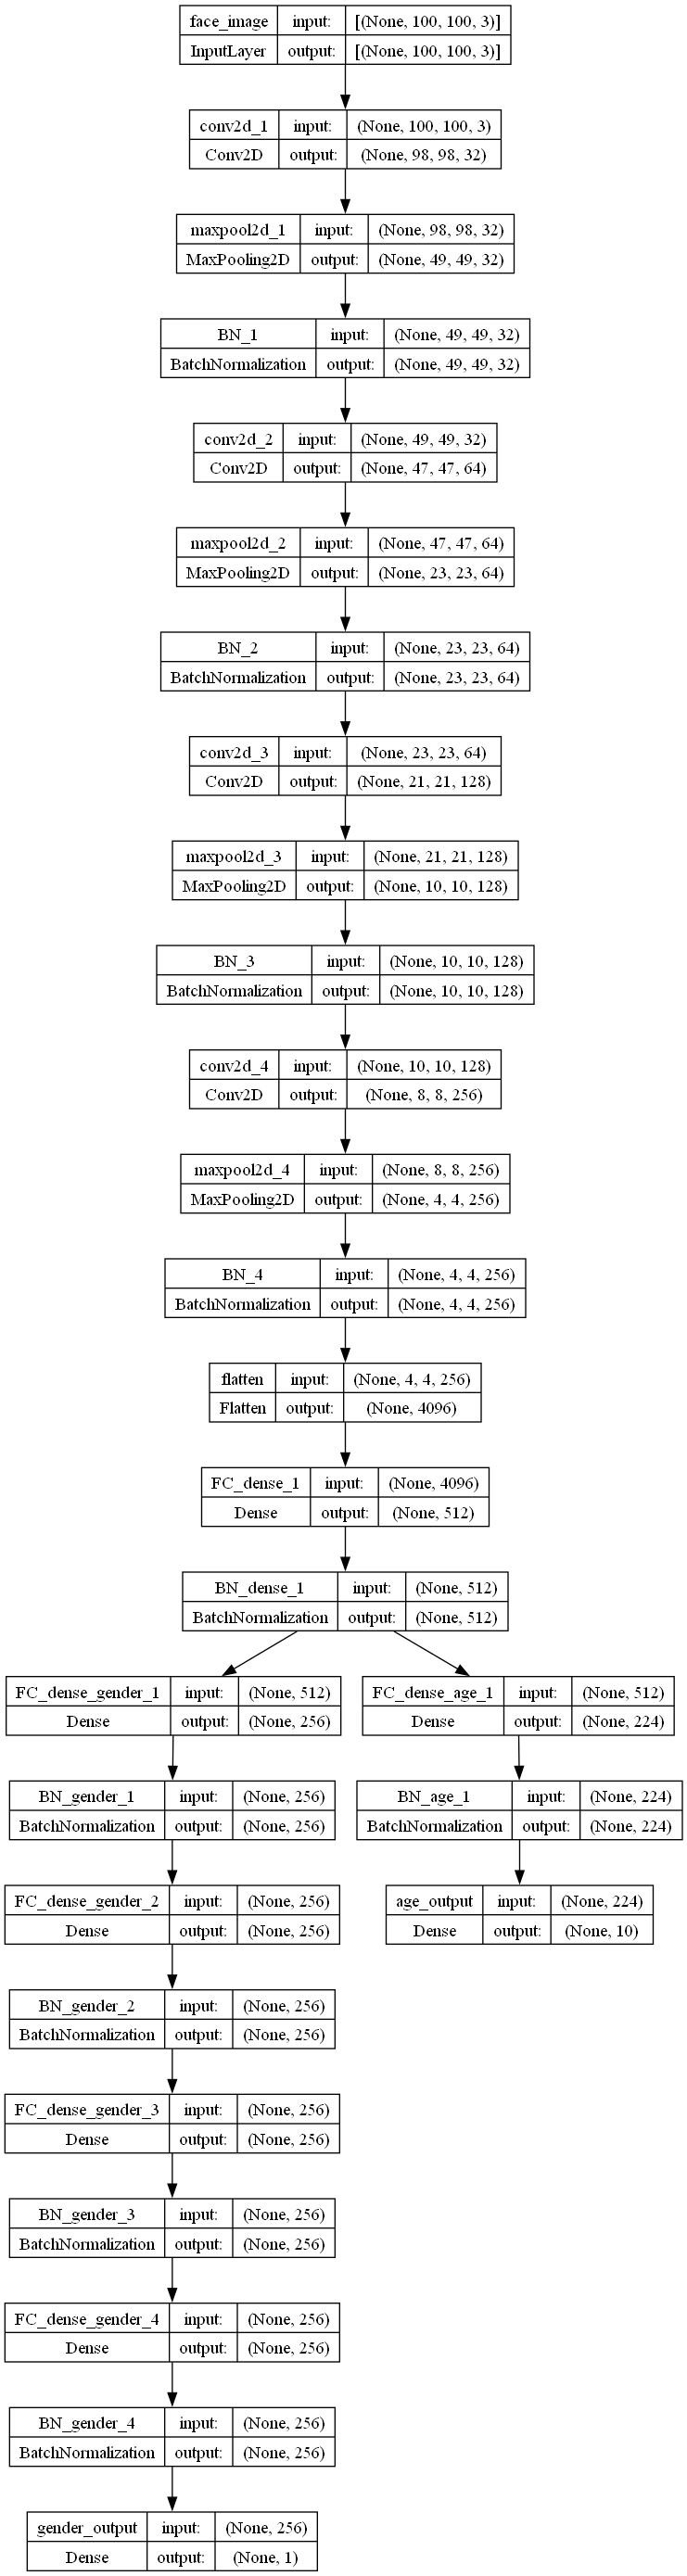

In [14]:
## Ensure the train and test directories exist
#os.makedirs(CNNmodel_dirPath, exist_ok=True)

import pydotplus.graphviz as gv

# Specify the GraphViz executable path
gv.find_graphviz()

# Now try to plot the model
from keras.utils import plot_model
plot_model(DL_model, to_file=result_filepath+"/main_model_architecture.png", show_shapes=True)


In [15]:
DL_model.compile(optimizer="adam",loss=["binary_crossentropy","categorical_crossentropy"],metrics=['accuracy'])

#### 2) saving the model in hd5

In [16]:
model_path=result_filepath+"/main_model_train.h5"
checkpointer = ModelCheckpoint(model_path, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

#### 3) model training

In [17]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [18]:
from keras.callbacks import CSVLogger

# Define the file path where you want to save the CSV file
csv_logger = CSVLogger('training.log')

In [19]:

class RealTimePlot(Callback):
    def __init__(self):
        super(RealTimePlot, self).__init__()
        self.fig, self.ax = plt.subplots(ncols=2, figsize=(15,7), sharex=True, sharey=True)
        self.fig.suptitle("Lineplots showing training and validation loss of CNN model by epochs", fontsize=16)
        self.train_loss = []
        self.train_gender_output_loss = []
        self.train_age_output_loss = []
        self.val_loss = []
        self.val_gender_output_loss = []
        self.val_age_output_loss = []

    def on_epoch_end(self, epoch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.train_gender_output_loss.append(logs.get('gender_output_loss'))
        self.train_age_output_loss.append(logs.get('age_output_loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.val_gender_output_loss.append(logs.get('val_gender_output_loss'))
        self.val_age_output_loss.append(logs.get('val_age_output_loss'))

        self.ax[0].cla()
        self.ax[0].plot(self.train_loss, label='Train Loss', color='red', marker='o', markersize=5)
        self.ax[0].plot(self.train_gender_output_loss, label='train_gender_output_loss', color="mediumpurple", marker='o', markersize=5)
        self.ax[0].plot(self.train_age_output_loss, label='train_age_output_loss', color='royalblue', marker='o', markersize=5)
        self.ax[0].set_xlabel('Epochs', fontsize=14)
        self.ax[0].set_ylabel("binary or categorical  Crossentropy loss", fontsize=14)
        self.ax[0].legend(fontsize=14)
        self.ax[0].tick_params(axis='both', labelsize=12)

        self.ax[1].cla()
        self.ax[1].plot(self.val_loss, label='val Loss', color='red', marker='*', markersize=5)
        self.ax[1].plot(self.val_gender_output_loss, label='val_gender_output_loss', color="mediumpurple", marker='*', markersize=5)
        self.ax[1].plot(self.val_age_output_loss, label='val_age_output_loss', color='royalblue', marker='*', markersize=5)
        self.ax[1].set_xlabel('Epochs', fontsize=14)
        self.ax[1].set_ylabel("binary or categorical  Crossentropy loss", fontsize=14)
        self.ax[1].legend(fontsize=14)
        self.ax[1].tick_params(axis='both', labelsize=12)

        plt.tight_layout()
        plt.pause(0.01)


In [20]:
train_faceImage = np.array(train_faceImage)
train_gender = np.array(train_gender,np.uint64)
val_faceImage = np.array(val_faceImage)
val_gender = np.array(val_gender,np.uint64)

In [21]:
#real_time_plot = RealTimePlot()
save = DL_model.fit(train_faceImage,[train_gender,train_age_encoded],batch_size=512,validation_data=(val_faceImage,[val_gender,val_age_encoded]),epochs=25,callbacks=[callback_list])  

Epoch 1/25


85/85 [==============================] - ETA: 0s - loss: 2.5257 - gender_output_loss: 0.5102 - age_output_loss: 2.0155 - gender_output_accuracy: 0.7448 - age_output_accuracy: 0.2710
Epoch 1: loss improved from inf to 2.52573, saving model to d:\deep learning\project for deep learning\Gender_Age-group_classification_project/experiments/experiment_01/result\main_model_train.h5


c:\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


85/85 [==============================] - 445s 5s/step - loss: 2.5257 - gender_output_loss: 0.5102 - age_output_loss: 2.0155 - gender_output_accuracy: 0.7448 - age_output_accuracy: 0.2710 - val_loss: 5.1080 - val_gender_output_loss: 1.0043 - val_age_output_loss: 4.1037 - val_gender_output_accuracy: 0.5150 - val_age_output_accuracy: 0.0694
Epoch 2/25
85/85 [==============================] - ETA: 0s - loss: 1.9460 - gender_output_loss: 0.3468 - age_output_loss: 1.5992 - gender_output_accuracy: 0.8427 - age_output_accuracy: 0.3938
Epoch 2: loss improved from 2.52573 to 1.94599, saving model to d:\deep learning\project for deep learning\Gender_Age-group_classification_project/experiments/experiment_01/result\main_model_train.h5
85/85 [==============================] - 382s 4s/step - loss: 1.9460 - gender_output_loss: 0.3468 - age_output_loss: 1.5992 - gender_output_accuracy: 0.8427 - age_output_accuracy: 0.3938 - val_loss: 4.0789 - val_gender_output_loss: 0.6534 - val_age_output_loss: 3.425

In [22]:
# train loss ##########################
train_loss = save.history['loss']
print("train_loss",train_loss)
train_gender_output_loss = save.history['gender_output_loss']
print("train_gender_output_loss",train_gender_output_loss)
train_age_output_loss = save.history['age_output_loss']
print("train_age_output_loss",train_age_output_loss)
# train accuracy ##########################
gender_output_accuracy = save.history['gender_output_accuracy']
print("gender_output_accuracy",gender_output_accuracy)
age_output_accuracy = save.history['age_output_accuracy']
print("age_output_accuracy",age_output_accuracy)

# validation loss ##########################
val_loss = save.history['val_loss']
print("val_loss",val_loss)
val_gender_output_loss = save.history['val_gender_output_loss']
print("val_gender_output_loss",val_gender_output_loss)
val_age_output_loss = save.history['val_age_output_loss']
print("val_age_output_loss",val_age_output_loss)
# validation accuracy ##########################
val_gender_output_accuracy = save.history['val_gender_output_accuracy']
print("val_gender_output_accuracy",val_gender_output_accuracy)
val_age_output_accuracy = save.history['val_age_output_accuracy']
print("val_age_output_accuracy",val_age_output_accuracy)

train_loss [2.525733470916748, 1.945987582206726, 1.630776047706604, 1.3705934286117554, 1.115841031074524, 0.8602606058120728, 0.627804160118103, 0.4200432002544403, 0.2777149975299835, 0.1887214034795761, 0.1364603340625763, 0.10379371792078018, 0.08248598873615265, 0.0780363380908966, 0.07552967965602875, 0.08640438318252563, 0.10463572293519974, 0.09927508980035782, 0.08957155048847198, 0.08529303222894669, 0.05704249441623688, 0.04158146306872368, 0.027962056919932365, 0.02404012531042099, 0.024853212758898735]
train_gender_output_loss [0.510223925113678, 0.34677115082740784, 0.25765419006347656, 0.19544090330600739, 0.1432591825723648, 0.10869301110506058, 0.07478760927915573, 0.05660753324627876, 0.04321477562189102, 0.03513781726360321, 0.02914627268910408, 0.024301616474986076, 0.017189139500260353, 0.01977350004017353, 0.019943716004490852, 0.017472514882683754, 0.02457243576645851, 0.018985813483595848, 0.015157402493059635, 0.01940370351076126, 0.01125872228294611, 0.008330

In [23]:
# train loss mean ##########################
train_loss_mean=sum(train_loss)/len(train_loss)
print("train_loss_mean:",train_loss_mean)
train_gender_output_loss_mean=sum(train_gender_output_loss)/len(train_gender_output_loss)
print("train_gender_output_loss_mean:",train_gender_output_loss_mean)
train_age_output_loss_mean=sum(train_age_output_loss)/len(train_age_output_loss)
print("train_age_output_loss_mean:",train_age_output_loss_mean)
# train accuracy ##########################
gender_output_accuracy_mean=sum(gender_output_accuracy)/len(gender_output_accuracy)
print("\ngender_output_accuracy_mean:",gender_output_accuracy_mean)
age_output_accuracy_mean=sum(age_output_accuracy)/len(age_output_accuracy)
print("age_output_accuracy_mean:",age_output_accuracy_mean)
# validation loss ##########################
val_loss_mean=sum(val_loss)/len(val_loss)
print("\nval_loss_mean:",val_loss_mean)
val_gender_output_loss_mean=sum(val_gender_output_loss)/len(val_gender_output_loss)
print("val_gender_output_loss_mean:",val_gender_output_loss_mean)
val_age_output_loss_mean=sum(val_age_output_loss)/len(val_age_output_loss)
print("val_age_output_loss_mean:",val_age_output_loss_mean)

# validation accuracy ##########################
val_gender_output_accuracy_mean=sum(val_gender_output_accuracy)/len(val_gender_output_accuracy)
print("\nval_gender_output_accuracy_mean:",val_gender_output_accuracy_mean)
val_age_output_accuracy_mean=sum(val_age_output_accuracy)/len(val_age_output_accuracy)
print("val_age_output_accuracy_mean:",val_age_output_accuracy_mean)



train_loss_mean: 0.4832176446914673
train_gender_output_loss_mean: 0.08092725783586502
train_age_output_loss_mean: 0.40229037702083587

gender_output_accuracy_mean: 0.9649543976783752
age_output_accuracy_mean: 0.8563196647167206

val_loss_mean: 3.142077589035034
val_gender_output_loss_mean: 0.4137119972705841
val_age_output_loss_mean: 2.7283656454086302

val_gender_output_accuracy_mean: 0.8788360834121705
val_age_output_accuracy_mean: 0.3638312318921089


#### 5) Plotting a line chart to visualize the loss and accuracy values by epochs.


Text(0.5, 0.92, 'Lineplots showing trainind and validation loss  of CNN model by epochs')

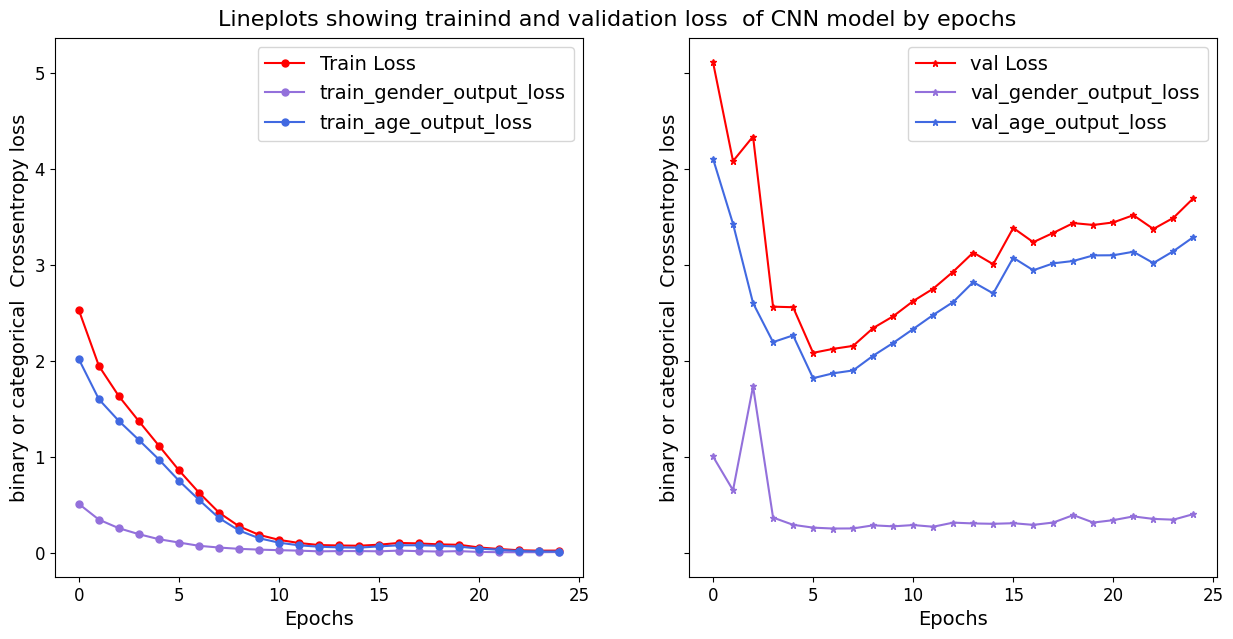

In [24]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7),sharex=True, sharey=True) 

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='red', marker='o', markersize=5)
ax[0].plot(train_gender_output_loss, label='train_gender_output_loss', color="mediumpurple", marker='o', markersize=5)
ax[0].plot(train_age_output_loss, label='train_age_output_loss', color='royalblue', marker='o', markersize=5)
#ax[0].plot(val_loss, label='val Loss', color = 'orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel("binary or categorical  Crossentropy loss", fontsize=14)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

#gnder_output_loss: 0.3613 - age_output_loss: 2.6563 - gnder_output_accuracy: 0.8555 - age_output_accuracy: 0.1491
# loss: 3.0175 - 
# gender_output_loss: 0.3613 - 
# age_output_loss: 2.6563 - 
# gnder_output_accuracy: 0.8555 
# age_output_accuracy: 0.1491 -
# val_loss: 2.6561 
# val_gnder_output_loss: 0.3314 
# val_age_output_loss: 2.3247 
# val_gnder_output_accuracy: 0.8573 
# val_age_output_accuracy: 0.2125

ax[1].plot(val_loss, label='val Loss', color = 'red', marker='*', markersize=5)
ax[1].plot(val_gender_output_loss, label='val_gender_output_loss', color="mediumpurple", marker='*', markersize=5)
ax[1].plot(val_age_output_loss, label='val_age_output_loss', color='royalblue', marker='*', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel("binary or categorical  Crossentropy loss", fontsize=14)
ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing trainind and validation loss  of CNN model by epochs", fontsize=16)

Text(0.5, 0.92, 'Lineplots showing test and validation accuracy of CNN model by epochs')

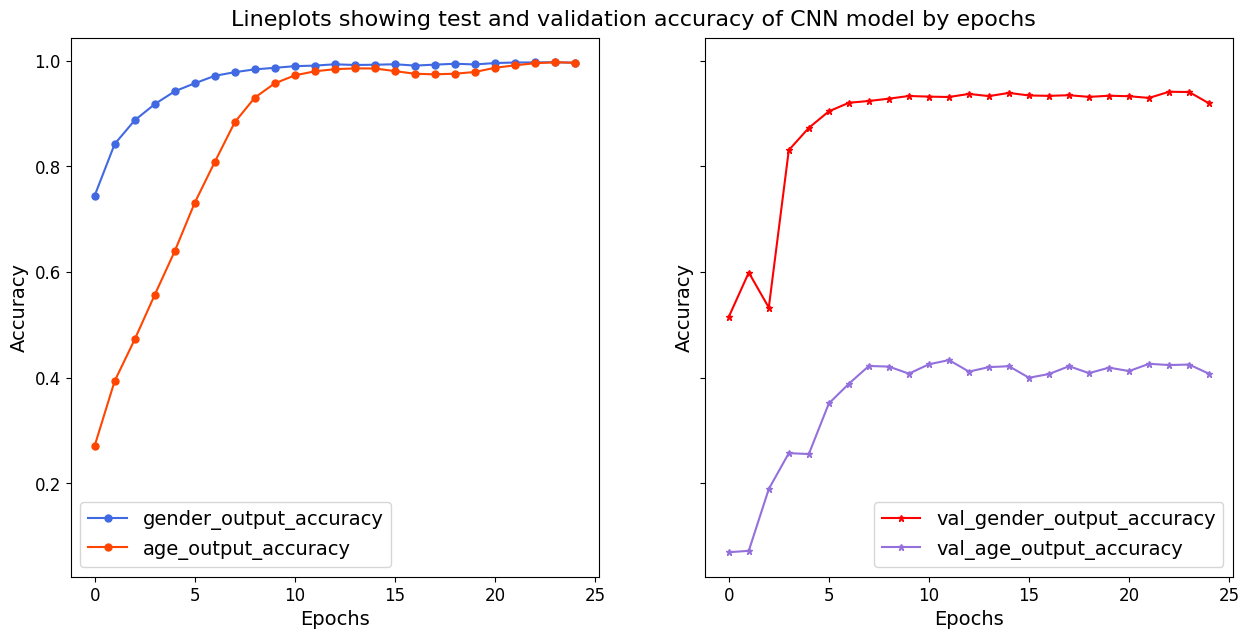

In [25]:
fig1, ax1 = plt.subplots(ncols=2, figsize=(15,7),sharex=True, sharey=True) 
ax1 = ax1.ravel()
ax1[0].plot(gender_output_accuracy, label='gender_output_accuracy', color='royalblue', marker='o', markersize=5)
ax1[0].plot(age_output_accuracy, label='age_output_accuracy', color='orangered', marker='o', markersize=5)
ax1[0].set_xlabel('Epochs', fontsize=14)
ax1[0].set_ylabel('Accuracy', fontsize=14)
ax1[0].legend(fontsize=14)
ax1[0].tick_params(axis='both', labelsize=12)

ax1[1].plot(val_gender_output_accuracy, label='val_gender_output_accuracy', color = 'red', marker='*', markersize=5)
ax1[1].plot(val_age_output_accuracy, label='val_age_output_accuracy', color="mediumpurple", marker='*', markersize=5)

ax1[1].set_xlabel('Epochs', fontsize=14)
ax1[1].set_ylabel("Accuracy", fontsize=14)
ax1[1].legend(fontsize=14)
ax1[1].tick_params(axis='both', labelsize=12)
fig1.suptitle(x=0.5, y=0.92, t="Lineplots showing test and validation accuracy of CNN model by epochs", fontsize=16)

### **Step #8**: save CNN model and performance in cvs file ith moodel

#### a) get the CNN model and performance metric

In [26]:
import pandas as pd

# Extracting architecture details
architecture = []

for layer in DLmodel.layers:
    layer_type = layer.__class__.__name__
    layer_config = layer.get_config()
    architecture.append((layer_type, layer_config))

# Assuming you have model history containing metrics
history = DLmodel.history.history

# Convert architecture to a DataFrame
architecture_df = pd.DataFrame(architecture, columns=['Layer Type', 'Layer Config'])
# Save architecture to CSV
#architecture_df.to_csv('cnn_architecture.csv', index=False)
# Convert history to a DataFrame
history_df = pd.DataFrame(history)
# Save history to CSV
#history_df.to_csv('training_log.csv', index_label='Epoch')

NameError: name 'DLmodel' is not defined

#### b) save  CNN model and performance metric in the csv file 

In [ ]:

# Creating summaryfile of model instance with different values
summaryfile= './model/'+str(saveMLmodelfile_name)+"/"+str(saveMLmodelfile_name)+".xlsx"

# Generating writer engine
writer = pd.ExcelWriter(summaryfile, engine='openpyxl')

# Adding dataframes to Excel as new sheets
architecture_df.to_excel(writer, sheet_name='cnn_architecture', index=False)
history_df.to_excel(writer, sheet_name='training_log', index=True,index_label='Epoch')
# Saving changes and closing writer
writer.book.save(summaryfile)#"modelsummary.xlsx")
writer.close()
